Author, date, class, assignment
Table of Contents

Sections
- Introduction: to the problem
- Hypotheses ?
- Data Preparation: .head() .tail() .columns .describe. .summary() isNan dropNa() dropRows outliers 3-std-devs, transformation
- Model ? 
- Visualizations: charts, graphs, table, etc...
- Conclusion: summary (numbers, not opinions)
- Implication: opinions 

Minimum rows: 10,000
Minimum columns: 3

# CS116 Project 1
Author: Paxson Wecker, Barrett Clark

Due Date: 4/21/25

Class: CS116 Scripting for Analytics 



# Introduction

Our dataset provides detailed information on Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) currently registered in the United States, specifically through the Washington State Department of Licensing (DOL). The dataset includes various attributes of these electric vehicles, such as make, model, year of registration, and other relevant data that reflects the growing trend of electric vehicle adoption in Washington State.

In [2]:
import pandas as pd

df=pd.read_csv('Electric_Vehicle_Population_Data.csv')

df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EBXK,King,Seattle,WA,98178.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,37.0,477309682,POINT (-122.23825 47.49461),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,5YJYGDEE3L,Kitsap,Poulsbo,WA,98370.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,0.0,23.0,109705683,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,KM8KRDAF5P,Kitsap,Olalla,WA,98359.0,2023,HYUNDAI,IONIQ 5,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,26.0,230390492,POINT (-122.54729 47.42602),PUGET SOUND ENERGY INC,5.303509e+10
3,5UXTA6C0XM,Kitsap,Seabeck,WA,98380.0,2021,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30.0,0.0,35.0,267929112,POINT (-122.81585 47.64509),PUGET SOUND ENERGY INC,5.303509e+10
4,JTMAB3FV7P,Thurston,Rainier,WA,98576.0,2023,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,2.0,236505139,POINT (-122.68993 46.88897),PUGET SOUND ENERGY INC,5.306701e+10


# Hypotheses

H1: Urban counties (e.g., King, Pierce, Snohomish) have a higher proportion of EV registrations compared to rural counties, likely due to better charging infrastructure.
---
H1 Data Visualization: To test this hypothesis, we will create a Chloropleth map to view the amount and proportion of registered EV's in each county of Washington State.

H2: Newer vehicle models (2020 and later) are more likely to be BEVs than PHEVs.
---
H2 Data Visualization: Histogram or stacked bar chart of model year vs. vehicle type.

# Data Preparation

In [31]:
import pandas as pd

# Select relevant columns to our tests and modeling
selected_columns = [
    'VIN (1-10)',
    'County',
    'Make',
    'Model',
    'Model Year',
    'Electric Vehicle Type',
    'Vehicle Location'
]
df_selected = df[selected_columns]

# Drop rows with missing values
df_cleaned = df_selected.dropna()

# Reset index after cleaning
df_cleaned.reset_index(drop=True, inplace=True)

# Display the cleaned DataFrame
df_cleaned.head()

,VIN (1-10),County,Make,Model,Model Year,Electric Vehicle Type,Vehicle Location
0,5YJ3E1EBXK,King,TESLA,MODEL 3,2019,Battery Electric Vehicle (BEV),POINT (-122.23825 47.49461)
1,5YJYGDEE3L,Kitsap,TESLA,MODEL Y,2020,Battery Electric Vehicle (BEV),POINT (-122.64681 47.73689)
2,KM8KRDAF5P,Kitsap,HYUNDAI,IONIQ 5,2023,Battery Electric Vehicle (BEV),POINT (-122.54729 47.42602)
3,5UXTA6C0XM,Kitsap,BMW,X5,2021,Plug-in Hybrid Electric Vehicle (PHEV),POINT (-122.81585 47.64509)
4,JTMAB3FV7P,Thurston,TOYOTA,RAV4 PRIME,2023,Plug-in Hybrid Electric Vehicle (PHEV),POINT (-122.68993 46.88897)


# Data Overview & Basic Descriptive Statistics

In [53]:
#Mode for 'Make"
popmake = df_cleaned['Make'].mode()[0]
pmacount = df_cleaned['Make'].value_counts()[popmake]
print("\n1. MAKE stats\n----------\nBased on our dataset, the most popular make of EV in Washington is",popmake,".\nThere are ",pmacount,popmake,"EVs recorded in our data, and their cars make up",round(100*(pmacount/len(df_cleaned)),1),"percent of the total # of EVs.")

#Mode for 'Model'
popmodel = df_cleaned['Model'].mode()[0]
pmocount = df_cleaned['Model'].value_counts()[popmodel]
makeofpmo = df_cleaned[df_cleaned['Model'] == popmodel].iloc[0]['Make']
print("\n\n2. MODEL stats\n----------\nBased on our dataset, the most popular model of EV in Washington is",popmodel, ".\nThere are", pmocount, makeofpmo, popmodel,"cars recorded in our data, and this model makes up", round(100*(pmocount/len(df_cleaned)),1), "percent of the total # of EVs.\nThis model makes up", round(100*pmocount/df_cleaned['Make'].value_counts()[makeofpmo],1), "percent of", makeofpmo, "EVs in our dataset.")

#Mode for 'Year'
popyear = df_cleaned['Model Year'].mode()[0]
pyrcount = df_cleaned['Model Year'].value_counts()[popyear]
print("\n\n3. YEAR stats\n----------\nBased on our dataset, the most common year for EVs in Washington is",popyear,".\nThere are",pyrcount,"EVs made in",popyear,"recorded in our data; they make up",round(100*pyrcount/len(df_cleaned),1),"percent of the total # of EVs.")


poptype = df_cleaned['Electric Vehicle Type'].mode()[0]
ptpcount = df_cleaned['Electric Vehicle Type'].value_counts()[poptype]
tpother=len(df_cleaned)-ptpcount
print("\n\n4. EV TYPE stats\n----------\nThere are two types of EV's in the dataset: Battery Electric Vehicles (BEV) & Plug-in Hybrid Electric Vehicles (PHEV).\nThere are",ptpcount,"EVs that are type 1,",poptype,", and ",tpother,"EVs that are type 2,",df_cleaned[df_cleaned['Electric Vehicle Type'] != poptype].iloc[0]['Electric Vehicle Type'],".")
print(round(100*ptpcount/len(df_cleaned),1),"percent of EVs recorded in our data are type 1,",poptype,".")

print("\n\n5. COUNTY stats\n----------\n# of EVs per County (as recorded in dataset)\n----------\n",df_cleaned["County"].value_counts().head(5),"\n")



1. MAKE stats
----------
Based on our dataset, the most popular make of EV in Washington is TESLA .
There are  101077 TESLA EVs recorded in our data, and their cars make up 42.9 percent of the total # of EVs.


2. MODEL stats
----------
Based on our dataset, the most popular model of EV in Washington is MODEL Y .
There are 49252 TESLA MODEL Y cars recorded in our data, and this model makes up 20.9 percent of the total # of EVs.
This model makes up 48.7 percent of TESLA EVs in our dataset.


3. YEAR stats
----------
Based on our dataset, the most common year for EVs in Washington is 2023 .
There are 59892 EVs made in 2023 recorded in our data; they make up 25.4 percent of the total # of EVs.


4. EV TYPE stats
----------
There are two types of EV's in the dataset: Battery Electric Vehicles (BEV) & Plug-in Hybrid Electric Vehicles (PHEV).
There are 186992 EVs that are type 1, Battery Electric Vehicle (BEV) , and  48690 EVs that are type 2, Plug-in Hybrid Electric Vehicle (PHEV) .
79.3 p

# Visualizations

## H1 Visualizations

### H1: Population-Adjusted Chloropleth Map of EV Distribution by County

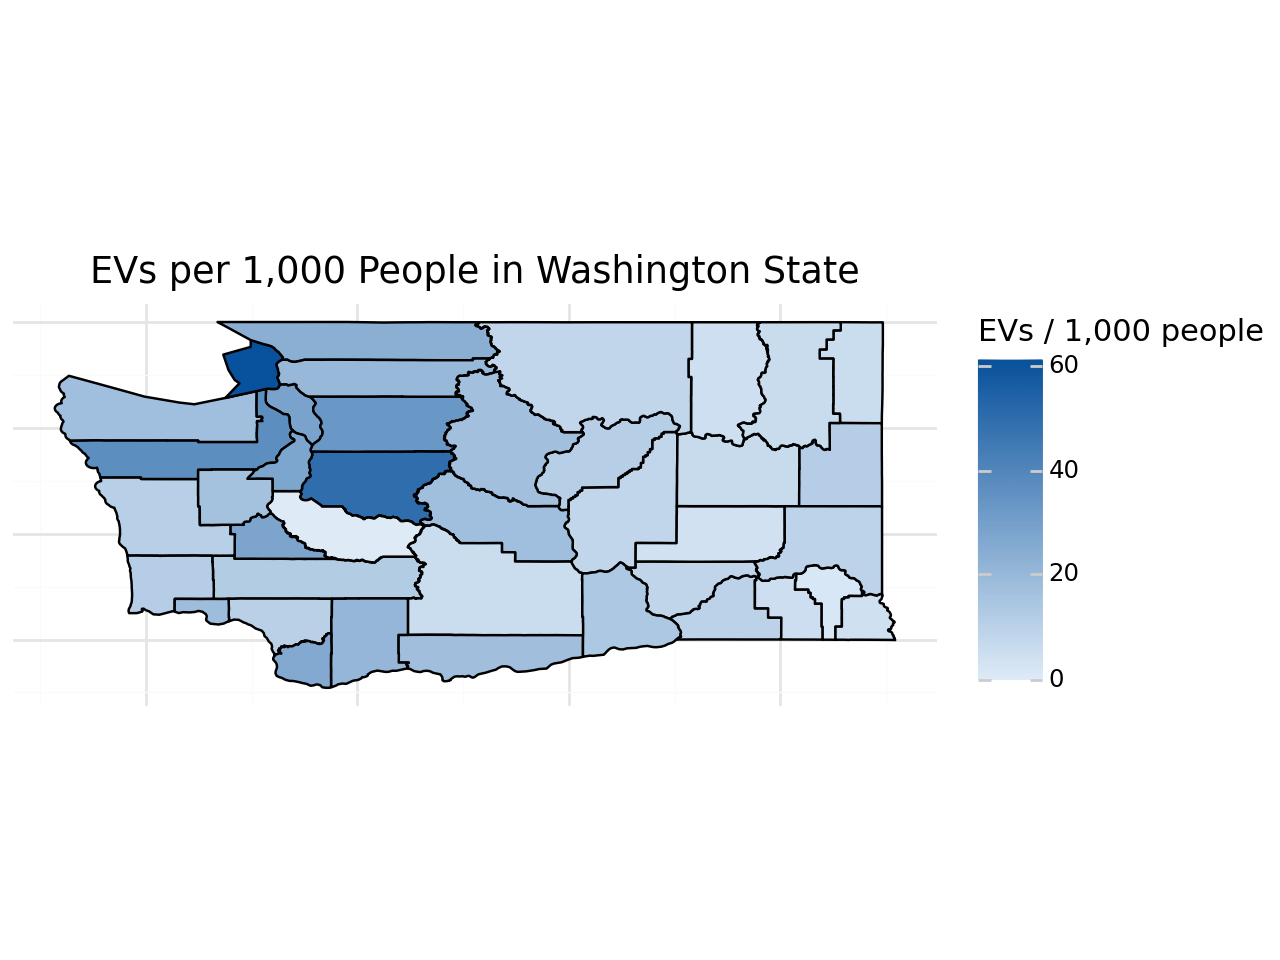

In [55]:
import geopandas as gpd
from shapely.geometry import Point, Polygon, MultiPolygon
from shapely.wkt import loads as wkt_loads
from plotnine import *

# Load EV data
ev_data = df_cleaned

# Count EVs per county
ev_counts = ev_data['County'].value_counts().reset_index()
ev_counts.columns = ['County', 'ev_count']
ev_counts['County'] = ev_counts['County'].str.lower().str.strip()


pop_data = pd.read_csv('WAOFM_-_April_1_-_Population_Change_and_Rank_by_County__2020_to_Present.csv')
pop_data['County'] = pop_data['COUNTY_NAME'].str.lower().str.strip()
pop_data = pop_data[['County', 'POP_2024']]


# Merge population with EV counts
ev_counts = ev_counts.merge(pop_data, on='County', how='left')
ev_counts['evs_per_1000'] = (ev_counts['ev_count'] / ev_counts['POP_2024']) * 1000

# Load GeoJSON
gdf = gpd.read_file("WA_County_Boundaries.geojson")
gdf['County'] = gdf['JURISDICT_LABEL_NM'].str.lower().str.strip()

# Merge EV per 1000 with spatial data
merged = gdf.merge(ev_counts[['County', 'evs_per_1000']], on='County', how='left')
merged['evs_per_1000'] = merged['evs_per_1000'].fillna(0)

# Explode MultiPolygons
merged = merged.explode(index_parts=False)

# Create a single unified WA state boundary
wa_boundary = merged.union_all()  # a MultiPolygon

# Extract exterior coordinates for polygons
rows = []
for _, row in merged.iterrows():
    geom = row['geometry']
    if isinstance(geom, Polygon):
        polygons = [geom]
    elif isinstance(geom, MultiPolygon):
        polygons = list(geom)
    else:
        continue

    for poly in polygons:
        coords = list(poly.exterior.coords)
        for lon, lat in coords:
            rows.append({
                'County': row['County'],
                'evs_per_1000': row['evs_per_1000'],
                'long': lon,
                'lat': lat
            })

map_df = pd.DataFrame(rows)

# Plot map
(ggplot() +
    geom_polygon(map_df, aes('long', 'lat', group='County', fill='evs_per_1000'), color='black') +
    coord_fixed() +
    scale_fill_gradient(low='#deebf7', high='#08519c') +
    theme_minimal() +
    theme(
        axis_text=element_blank(),
        axis_ticks=element_blank(),
        axis_title=element_blank()
    ) +
    labs(
        title='EVs per 1,000 People in Washington State',
        fill='EVs / 1,000 people'
    )
)


### H1: Bar-Chart Comparing # of EVs per 1000 Residents by County

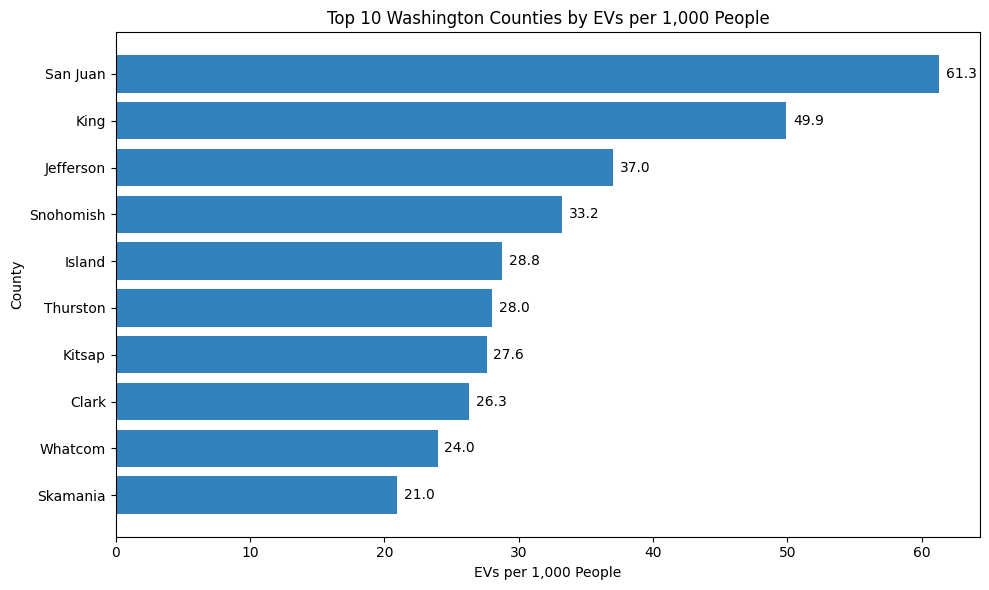

In [56]:
import matplotlib.pyplot as plt

# Load EV data and population data
ev_data = df_cleaned
pop_data = pd.read_csv('WAOFM_-_April_1_-_Population_Change_and_Rank_by_County__2020_to_Present.csv')

# Prepare EV counts by county
ev_counts = ev_data['County'].value_counts().reset_index()
ev_counts.columns = ['County', 'ev_count']
ev_counts['County'] = ev_counts['County'].str.lower().str.strip()

# Prepare population data
pop_data['County'] = pop_data['COUNTY_NAME'].str.lower().str.strip()
pop_data = pop_data[['County', 'POP_2024']]

# Merge and compute EVs per 1,000 people
ev_counts = ev_counts.merge(pop_data, on='County', how='left')
ev_counts['evs_per_1000'] = (ev_counts['ev_count'] / ev_counts['POP_2024']) * 1000

# Drop any rows with missing data
ev_counts = ev_counts.dropna(subset=['evs_per_1000'])

# Get top 10 counties by EVs per 1,000 people
top_ev = ev_counts.sort_values(by='evs_per_1000', ascending=False).head(10)
top_ev['County'] = top_ev['County'].str.title()

# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(top_ev['County'], top_ev['evs_per_1000'], color='#3182bd')
plt.xlabel('EVs per 1,000 People')
plt.ylabel('County')
plt.title('Top 10 Washington Counties by EVs per 1,000 People')
plt.gca().invert_yaxis()  # Highest bar on top

# Add labels to bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height() / 2,
             f'{width:.1f}', va='center')

plt.tight_layout()
plt.show()

## H2 Visualizations

### H2: Stacked Bar Chart - EV Type by Model Year

C:\Users\barre\AppData\Local\Temp\ipykernel_38736\1931572216.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<Figure size 1200x600 with 0 Axes>

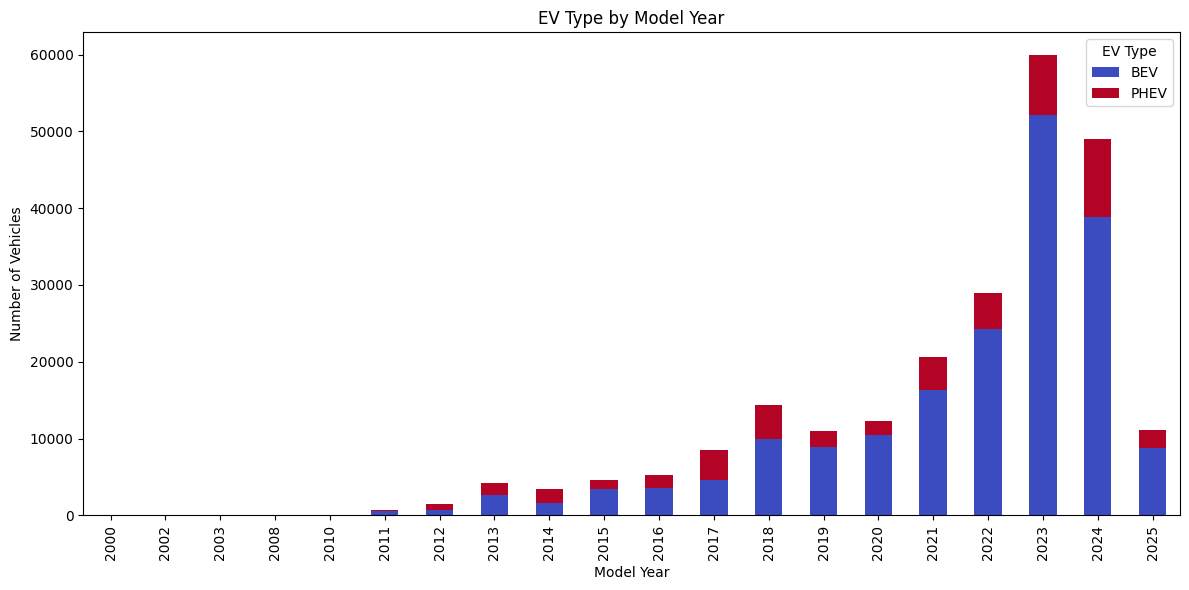

In [61]:
import seaborn as sns

df_cleaned['Model Year'] = df_cleaned['Model Year'].astype(int)

dfh = df_cleaned[df_cleaned['Electric Vehicle Type'].isin(['Battery Electric Vehicle (BEV)', 'Plug-in Hybrid Electric Vehicle (PHEV)'])]

# Map simplified labels
dfh['EV_Type'] = dfh['Electric Vehicle Type'].map({
    'Battery Electric Vehicle (BEV)': 'BEV',
    'Plug-in Hybrid Electric Vehicle (PHEV)': 'PHEV'
})

plt.figure(figsize=(12, 6))
model_type_counts = pd.crosstab(dfh['Model Year'], dfh['EV_Type'])
model_type_counts.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(12, 6))
plt.title('EV Type by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles')
plt.legend(title='EV Type')
plt.tight_layout()
plt.show()


# Summary

In [68]:
# H1: Urban vs Rural EV proportions

# Define urban counties (based of data from doh.wa.gov) (https://doh.wa.gov/sites/default/files/legacy/Documents/Pubs//609003.pdf)
urban_counties = ['king', 'pierce', 'snohomish','whatcom','kitsap','thurston','clark','benton','spokane']

# Compute total EVs and population for urban and non-urban
ev_counts['is_urban'] = ev_counts['County'].isin(urban_counties)

urban_stats = ev_counts.groupby('is_urban').agg({
    'ev_count': 'sum',
    'POP_2024': 'sum'
}).reset_index()

urban_stats['evs_per_1000'] = (urban_stats['ev_count'] / urban_stats['POP_2024']) * 1000

urban_val = urban_stats.loc[urban_stats['is_urban'] == True, 'evs_per_1000'].values[0]
rural_val = urban_stats.loc[urban_stats['is_urban'] == False, 'evs_per_1000'].values[0]

# H2: BEV vs PHEV proportion pre- and post-2020

df_cleaned['Model Year'] = df_cleaned['Model Year'].astype(int)
df_cleaned = df_cleaned[df_cleaned['Electric Vehicle Type'].isin(['Battery Electric Vehicle (BEV)', 'Plug-in Hybrid Electric Vehicle (PHEV)'])]

df_cleaned['year_group'] = df_cleaned['Model Year'].apply(lambda x: '2020+' if x >= 2020 else 'Before 2020')
df_cleaned['EV_Type'] = df_cleaned['Electric Vehicle Type'].map({
    'Battery Electric Vehicle (BEV)': 'BEV',
    'Plug-in Hybrid Electric Vehicle (PHEV)': 'PHEV'
})

bev_share = df_cleaned.groupby('year_group')['EV_Type'].value_counts(normalize=True).unstack().fillna(0)
bev_share_2020plus = bev_share.loc['2020+', 'BEV'] * 100
bev_share_before2020 = bev_share.loc['Before 2020', 'BEV'] * 100

# Final printed conclusion
print("---- Conclusion ----\n")

# H1 conclusion
print(f"H1: Urban counties have an average of {urban_val:.2f} EVs per 1,000 people, compared to {rural_val:.2f} in rural counties.\n")

# H2 conclusion
print(f"H2: {bev_share_2020plus:.1f}% of vehicles from model year 2020 and later are BEVs, compared to {bev_share_before2020:.1f}% before 2020.")



---- Conclusion ----

H1: Urban counties have an average of 35.89 EVs per 1,000 people, compared to 13.29 in rural counties.

H2: 82.8% of vehicles from model year 2020 and later are BEVs, compared to 67.5% before 2020.


# Implication

H1: Urban counties (e.g., King, Pierce, Snohomish) have a higher proportion of EV registrations compared to rural counties.

The analysis showed that urban counties averaged 35.89 EVs per 1,000 people, while rural counties averaged 13.29. This clear gap supports the hypothesis that urban areas have a higher concentration of electric vehicles. The choropleth map visualized this disparity across Washington State, with darker shades clustered around urban regions, reinforcing the numerical result. This suggests that factors like charging infrastructure availability, income levels, and policy incentives may be more concentrated in urban environments, making EV ownership more accessible and appealing.

**Conclusion: The statistical evidence and spatial visualization both support H1.**

H2: Newer vehicle models (2020 and later) are more likely to be BEVs than PHEVs.

Data from the vehicle dataset showed that 82.8% of EVs from model year 2020 or later were Battery Electric Vehicles (BEVs), compared to 67.5% for older vehicles. This shift in proportions supports the hypothesis and is visually emphasized in the stacked bar chart by model year and vehicle type, which clearly shows BEVs overtaking PHEVs in more recent years. The trend aligns with broader market shifts and technological improvements in battery range, charging speed, and BEV affordability.

**Conclusion: Both the data and the visual patterns confirm H2, suggesting a strong industry-wide move toward fully electric vehicles.**